In [1]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('../horse-or-human/horses/')

# Directory with our training human pictures
train_human_dir = os.path.join('../horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('../validation-horse-or-human/horses/')

# Directory with our training human pictures
validation_human_dir = os.path.join('../validation-horse-or-human/humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

In [3]:
import tensorflow as tf

In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [6]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1/255)
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../horse-or-human/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '../validation-horse-or-human/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/30
8/8 [==============================] - 81s 9s/step - loss: 1.4040 - accuracy: 0.5307 - val_loss: 0.6351 - val_accuracy: 0.6367
Epoch 2/30
8/8 [==============================] - 77s 9s/step - loss: 0.6400 - accuracy: 0.6326 - val_loss: 0.6534 - val_accuracy: 0.5508
Epoch 3/30
8/8 [==============================] - 76s 9s/step - loss: 0.6368 - accuracy: 0.6489 - val_loss: 0.5064 - val_accuracy: 0.8555
Epoch 4/30
8/8 [==============================] - 77s 9s/step - loss: 0.5967 - accuracy: 0.7243 - val_loss: 0.3664 - val_accuracy: 0.8633
Epoch 5/30
8/8 [==============================] - 76s 9s/step - loss: 0.6095 - accuracy: 0.6951 - val_loss: 0.4488 - val_accuracy: 0.8125
Epoch 6/30
8/8 [==============================] - 77s 9s/step - loss: 0.5710 - accuracy: 0.7203 - val_loss: 0.2544 - val_accuracy: 0.9297
Epoch 7/30
8/8 [==============================] - 77s 9s/step - loss: 0.4526 - accuracy: 0.7840 - val_loss: 0.1732 - val_accuracy: 0.9570
Epoch 8/30
8/8 [==================

In [2]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
cap = cv2.VideoCapture(0)
# faceCascade = cv2.CascadeClassifier('/home/yahyaubuntu/Desktop/basicForMl/haarcascade_frontalface_default.xml')
while(True):

    ret, frame = cap.read()
    resized = cv2.resize(frame, (200,200), interpolation = cv2.INTER_AREA)
#     faces = faceCascade.detectMultiScale(resized,1.1,1)
#     for (x,y,w,h) in faces :
#         cv2.rectangle(resized,(x,y),(x+w,y+h),(0,0,255),1)
    x = image.img_to_array(resized)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes)
    if classes[0]>0.5:
        print(  " is a human")
        cv2.putText(resized,str(classes)+'human',(20,20),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255))
    else:
        print(  " is a horse") 
        cv2.putText(resized,str(classes)+'hourse',(20,20),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0))

    cv2.imshow('frame',resized)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()  

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [94]:
# path = '/home/yahyaubuntu/Desktop/horse-or-human/humans/human01-00.png'
# img = image.load_img(path, target_size=(50, 50))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
# classes = model.predict(images, batch_size=10)
# print(classes[0])
# if classes[0]>0.5:
#     print(  " is a human")
# else:
#     print(  " is a horse") 

In [ ]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

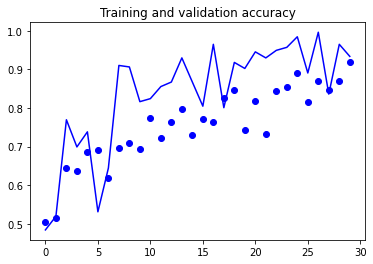

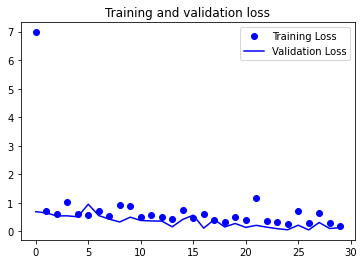

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()